In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skt
import seaborn as sns

In [77]:
AdventureWorksData = pd.read_csv('/content/AdventureWorksDatabase - Sheet1-5.csv')
AdventureWorksData.head()
AdventureWorksData.describe()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,8,10,11,14,15,16,17,25,26,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CustomerKey,SalesOrderLineNumber,OrderQuantity,ProductKey,SalesTerritoryKey,SalesAmount,ProductKey.1,ProductSubcategoryKey,SalesTerritoryKey.1,CalendarYear,DateKey,DayNumberOfMonth,DayNumberOfYear,DayNumberOfWeek,FiscalYear,CustomerKey.1,YearlyIncome
count,60398.000000,60398.000000,60398.0,60398.000000,60398.000000,60398.000000,606.00000,37.000000,11.000000,3652.000000,3.652000e+03,3652.000000,3652.000000,3652.000000,3652.000000,18484.000000,18484.000000
mean,18841.685420,1.886321,1.0,437.557932,6.244462,486.086911,303.50000,19.000000,6.000000,2009.500274,2.009567e+07,15.727820,183.100219,3.999179,2009.604053,20241.500000,57305.777970
std,5432.430404,1.016328,0.0,118.088390,2.961150,928.489892,175.08141,10.824355,3.316625,2.872293,2.872496e+04,8.800529,105.438580,2.000479,2.517833,5336.015523,32285.841703
min,11000.000000,1.000000,1.0,214.000000,1.000000,2.290000,1.00000,1.000000,1.000000,2005.000000,2.005010e+07,1.000000,1.000000,1.000000,2005.000000,11000.000000,10000.000000
25%,14003.000000,1.000000,1.0,359.000000,4.000000,7.950000,152.25000,10.000000,3.500000,2007.000000,2.007070e+07,8.000000,92.000000,2.000000,2008.000000,15620.750000,30000.000000
50%,18143.000000,2.000000,1.0,479.000000,7.000000,29.990000,303.50000,19.000000,6.000000,2009.500000,2.009567e+07,16.000000,183.000000,4.000000,2010.000000,20241.500000,60000.000000
75%,23429.750000,2.000000,1.0,529.000000,9.000000,539.990000,454.75000,28.000000,8.500000,2012.000000,2.012070e+07,23.000000,274.000000,6.000000,2012.000000,24862.250000,70000.000000
max,29483.000000,8.000000,1.0,606.000000,10.000000,3578.270000,606.00000,37.000000,11.000000,2014.000000,2.014123e+07,31.000000,366.000000,7.000000,2014.000000,29483.000000,170000.000000


In [78]:
AdventureWorksData.isnull().sum()
AdventureWorksData.columns
AdventureWorksData.dtypes

ProductName                       object
CustomerKey                      float64
OrderDate                         object
SalesOrderLineNumber             float64
OrderQuantity                    float64
ProductKey                       float64
SalesOrderNumber                  object
SalesTerritoryKey                float64
SalesTerritoryGroup               object
SalesAmount                      float64
EnglishProductCategoryName        object
EnglishProductName                object
ProductKey.1                     float64
ProductSubcategoryKey            float64
ProductAlternateKey               object
EnglishProductSubcategoryName     object
SalesTerritoryRegion              object
SalesTerritoryCountry             object
SalesTerritoryKey.1              float64
CalendarYear                     float64
DateKey                          float64
DayNumberOfMonth                 float64
DayNumberOfYear                  float64
DayNumberOfWeek                  float64
FiscalYear      

In [75]:
reference_date = pd.to_datetime('2011-11-01')
reference_df = AdventureWorksData.loc[(AdventureWorksData['OrderDate'] < '2011-11-01')]
reference_df.head()

,ProductName,CustomerKey,OrderDate,SalesOrderLineNumber,OrderQuantity,ProductKey,SalesOrderNumber,SalesTerritoryKey,SalesTerritoryGroup,SalesAmount,...,DayNumberOfYear,DayNumberOfWeek,FiscalYear,FullDateAlternateKey,BirthDate,CustomerKey.1,Gender,FirstName,LastName,YearlyIncome
14,Decal 2,27606.0,2011-01-01,1.0,1.0,314.0,SO43711,1.0,NaN,3578.27,...,15.0,7.0,2005.0,1/15/05,11/6/73,11014.0,F,Sydney,Bennett,100000.0
15,Down Tube,13513.0,2011-01-01,1.0,1.0,311.0,SO43712,8.0,NaN,3578.27,...,16.0,1.0,2005.0,1/16/05,8/26/84,11015.0,F,Chloe,Young,30000.0
16,Mountain End Caps,27601.0,2011-01-02,1.0,1.0,310.0,SO43713,4.0,NaN,3578.27,...,17.0,2.0,2005.0,1/17/05,10/25/84,11016.0,M,Wyatt,Hill,30000.0
17,Road End Caps,13591.0,2011-01-02,1.0,1.0,311.0,SO43714,10.0,NaN,3578.27,...,18.0,3.0,2005.0,1/18/05,12/24/49,11017.0,F,Shannon,Wang,20000.0
18,Touring End Caps,16483.0,2011-01-02,1.0,1.0,314.0,SO43715,9.0,NaN,3578.27,...,19.0,4.0,2005.0,1/19/05,10/6/55,11018.0,M,Clarence,Rai,30000.0


In [80]:
reference_df.columns

Index(['ProductName', 'CustomerKey', 'OrderDate', 'SalesOrderLineNumber',
       'OrderQuantity', 'ProductKey', 'SalesOrderNumber', 'SalesTerritoryKey',
       'SalesTerritoryGroup', 'SalesAmount', 'EnglishProductCategoryName',
       'EnglishProductName', 'ProductKey.1', 'ProductSubcategoryKey',
       'ProductAlternateKey', 'EnglishProductSubcategoryName',
       'SalesTerritoryRegion', 'SalesTerritoryCountry', 'SalesTerritoryKey.1',
       'CalendarYear', 'DateKey', 'DayNumberOfMonth', 'DayNumberOfYear',
       'DayNumberOfWeek', 'FiscalYear', 'FullDateAlternateKey', 'BirthDate',
       'CustomerKey.1', 'Gender', 'FirstName', 'LastName', 'YearlyIncome'],
      dtype='object')

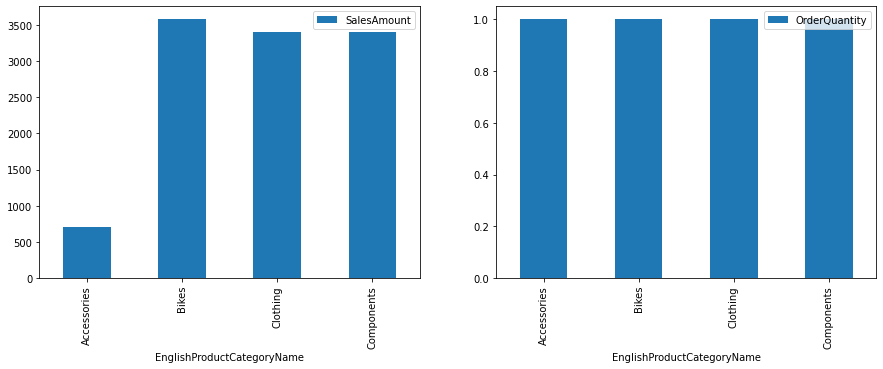

In [8]:
product_amount = AdventureWorksData[['EnglishProductCategoryName','SalesAmount']]
product_quantity = AdventureWorksData[['EnglishProductCategoryName','OrderQuantity']]

fig, axarr = plt.subplots(1, 2,figsize = (15,5))
product_amount.groupby("EnglishProductCategoryName").sum().plot(kind="bar",ax=axarr[0])
product_quantity.groupby("EnglishProductCategoryName").sum().plot(kind="bar",ax=axarr[1])


In [ ]:
import numpy as np

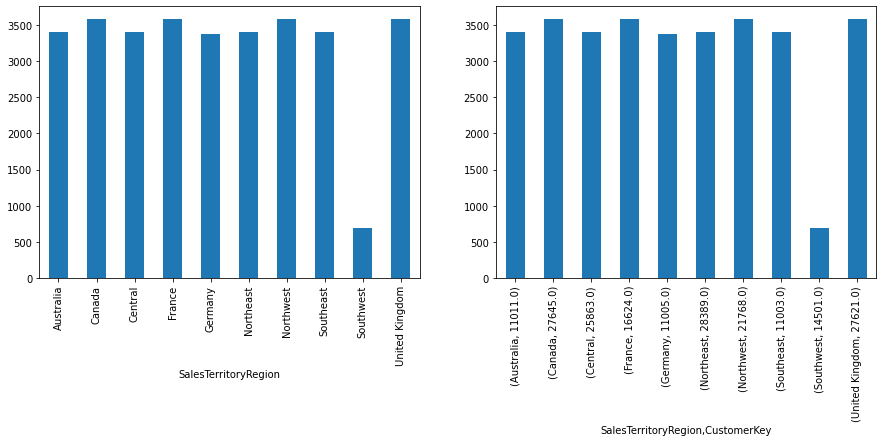

In [81]:
regionterritory = AdventureWorksData.groupby(["SalesTerritoryRegion"]).sum()
total_price = regionterritory["SalesAmount"].groupby(level=0, group_keys=False)
plotregion = total_price.nlargest(5)
regioncustomer = AdventureWorksData.groupby(["SalesTerritoryRegion",'CustomerKey']).sum()
total_price = regioncustomer["SalesAmount"].groupby(level=0, group_keys=False)
plotcustomer = total_price.nlargest(5)
fig, axarr = plt.subplots(1, 2,figsize = (15,5))
plotregion.plot(kind="bar",ax=axarr[0])
plotcustomer.plot(kind="bar",ax=axarr[1])

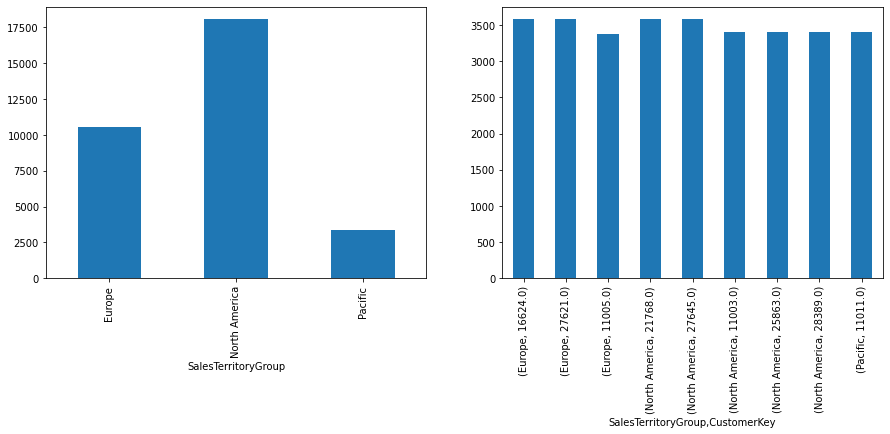

In [82]:
territorygroup = AdventureWorksData.groupby(["SalesTerritoryGroup"]).sum()
total_price = territorygroup["SalesAmount"].groupby(level=0, group_keys=False)
plotterritory = total_price.nlargest(5)
territorycustomer = AdventureWorksData.groupby(["SalesTerritoryGroup",'CustomerKey']).sum()
total_price = territorycustomer["SalesAmount"].groupby(level=0, group_keys=False)
plotcustomer = total_price.nlargest(5)
fig, axarr = plt.subplots(1, 2,figsize = (15,5))
plotterritory.plot(kind="bar",ax=axarr[0])
plotcustomer.plot(kind="bar",ax=axarr[1])

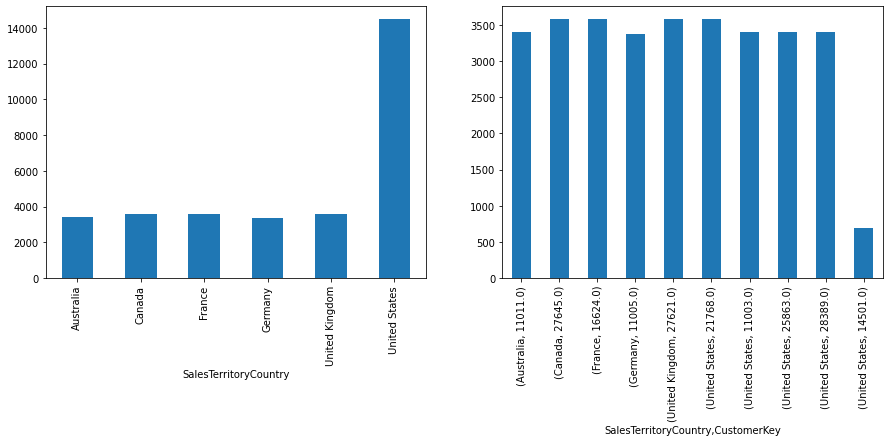

In [83]:
countryterritory = AdventureWorksData.groupby(["SalesTerritoryCountry"]).sum()
total_price = countryterritory["SalesAmount"].groupby(level=0, group_keys=False)
plotcountry = total_price.nlargest(5)
countrycustomer = AdventureWorksData.groupby(["SalesTerritoryCountry",'CustomerKey']).sum()
total_price = countrycustomer["SalesAmount"].groupby(level=0, group_keys=False)
plotcustomer = total_price.nlargest(5)
fig, axarr = plt.subplots(1, 2,figsize = (15,5))
plotcountry.plot(kind="bar",ax=axarr[0])
plotcustomer.plot(kind="bar",ax=axarr[1])

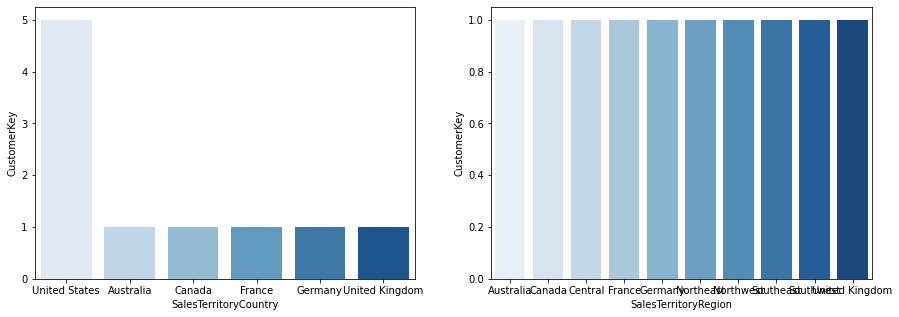

In [14]:
fig, axarr = plt.subplots(1, 2,figsize = (15,5))
customercountry = reference_df.groupby('SalesTerritoryCountry')['CustomerKey'].nunique().sort_values(ascending=False).reset_index().head(11)
sns.barplot(data=customercountry,x='SalesTerritoryCountry',y='CustomerKey',palette='Blues',ax=axarr[0])
customerregion = reference_df.groupby('SalesTerritoryRegion')['CustomerKey'].nunique().sort_values(ascending=False).reset_index().head(11)
sns.barplot(data=customerregion,x='SalesTerritoryRegion',y='CustomerKey',palette='Blues',ax=axarr[1])


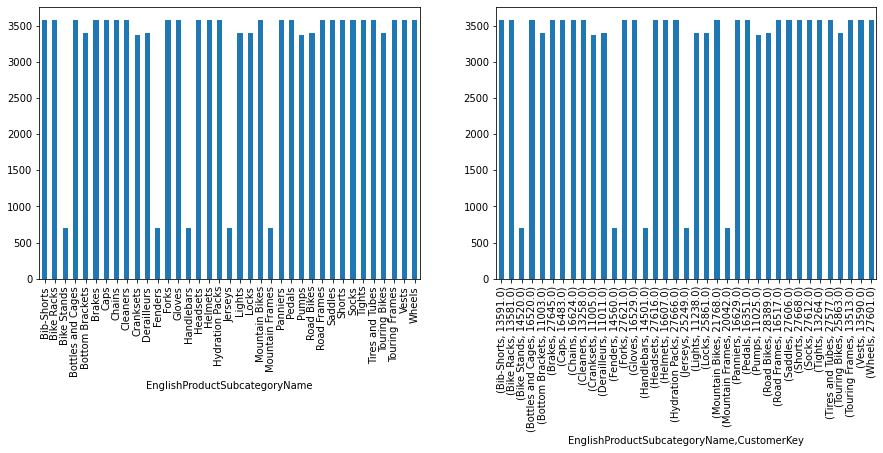

In [85]:
subcategory = AdventureWorksData.groupby(["EnglishProductSubcategoryName"]).sum()
total_price = subcategory["SalesAmount"].groupby(level=0, group_keys=False)
plotsub = total_price.nlargest(5)
customersub = AdventureWorksData.groupby(["EnglishProductSubcategoryName",'CustomerKey']).sum()
total_price = customersub["SalesAmount"].groupby(level=0, group_keys=False)
plotcustomer = total_price.nlargest(5)
fig, axarr = plt.subplots(1, 2,figsize = (15,5))
plotsub.plot(kind="bar",ax=axarr[0])
plotcustomer.plot(kind="bar",ax=axarr[1])

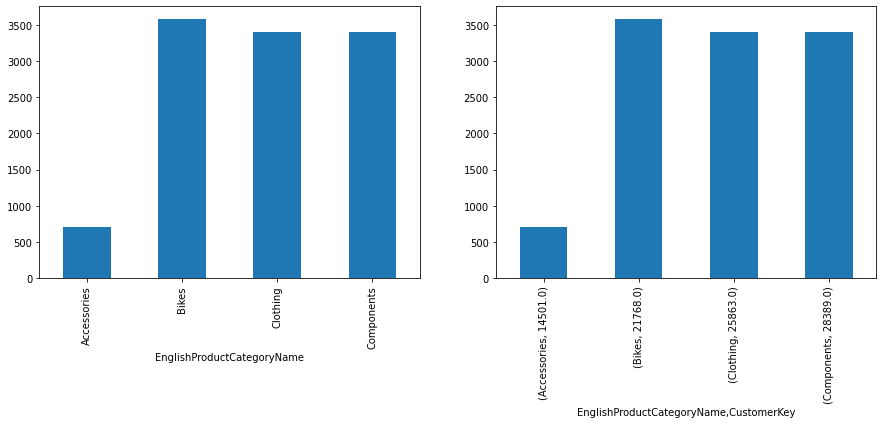

In [87]:
category = AdventureWorksData.groupby(["EnglishProductCategoryName"]).sum()
total_price = category["SalesAmount"].groupby(level=0, group_keys=False)
plotcategory = total_price.nlargest(5)
categorycustomer = AdventureWorksData.groupby(["EnglishProductCategoryName",'CustomerKey']).sum()
total_price = categorycustomer["SalesAmount"].groupby(level=0, group_keys=False)
plotcustomer = total_price.nlargest(5)
fig, axarr = plt.subplots(1, 2,figsize = (15,5))
plotcategory.plot(kind="bar",ax=axarr[0])
plotcustomer.plot(kind="bar",ax=axarr[1])

In [20]:
AdventureWorksData.drop(AdventureWorksData[AdventureWorksData['OrderDate'] == '##########'].index, inplace=True)

In [21]:
AdventureWorksData['OrderDate'] = pd.to_datetime(AdventureWorksData['OrderDate'])

In [33]:
recency = reference_df
recency = recency.groupby(by='CustomerKey',as_index=False)['OrderDate'].max()
recency.columns = ['CustomerKey','max_date']
recency['Recency'] = recency['max_date'].apply(lambda row: (reference_date - row).days)
recency.drop('max_date',inplace=True,axis=1)
recency[['CustomerKey','Recency']].head()

,CustomerKey,Recency
0,11000.0,-549
1,11002.0,298
2,11003.0,-431
3,11004.0,-547
4,11005.0,-548


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


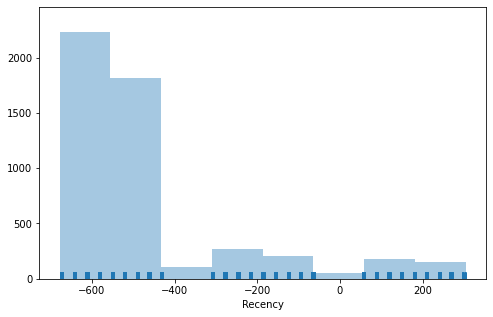

In [35]:
plt.figure(figsize=(8,5))
sns.distplot(recency.Recency,bins=8,kde=False,rug=True)

In [36]:
frequency = reference_df
frequency = frequency.groupby(by='CustomerKey')['SalesOrderLineNumber'].nunique()
frequency.columns = ['CustomerKey','Frequency']
frequency.head()

CustomerKey
11000.0    5
11002.0    1
11003.0    4
11004.0    2
11005.0    1
Name: SalesOrderLineNumber, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


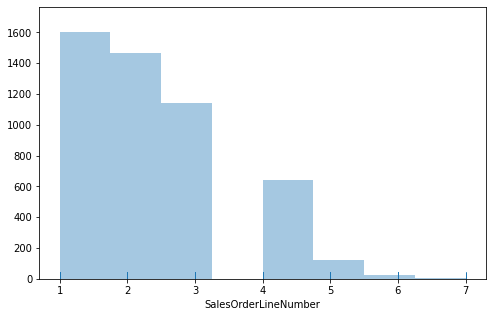

In [38]:
plt.figure(figsize=(8,5))
sns.distplot(frequency,bins=8,kde=False,rug=True)

In [39]:
monetary = reference_df
monetary = monetary.groupby(by='CustomerKey',as_index=False)['SalesAmount'].sum()
monetary.columns = ['CustomerKey','Monetary']
monetary.head()

,CustomerKey,Monetary
0,11000.0,2507.03
1,11002.0,3399.99
2,11003.0,2318.96
3,11004.0,2419.06
4,11005.0,2384.07


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


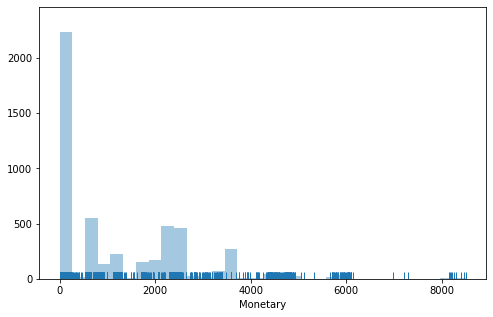

In [40]:
plt.figure(figsize=(8,5))
sns.distplot(monetary.Monetary,kde=False,rug=True)

In [41]:
rf = pd.merge(recency,frequency,on='CustomerKey')
rf.head()
rf.count()

CustomerKey             5012
Recency                 5012
SalesOrderLineNumber    5012
dtype: int64

In [42]:
rfm = rf.merge(monetary,on='CustomerKey')
rfm.head()
rfm.count()

CustomerKey             5012
Recency                 5012
SalesOrderLineNumber    5012
Monetary                5012
dtype: int64

In [43]:
rfm.head()

,CustomerKey,Recency,SalesOrderLineNumber,Monetary
0,11000.0,-549,5,2507.03
1,11002.0,298,1,3399.99
2,11003.0,-431,4,2318.96
3,11004.0,-547,2,2419.06
4,11005.0,-548,1,2384.07


Text(0, 0.5, 'Frequency')

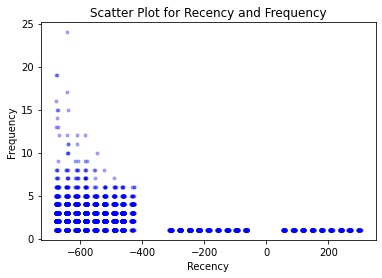

In [45]:
plt.scatter(rfm.groupby('CustomerKey')['Recency'].sum(), reference_df.groupby('CustomerKey')['OrderQuantity'].sum(),
            color = 'blue', marker = '.', alpha = 0.3)

plt.title('Scatter Plot for Recency and Frequency') 
plt.xlabel('Recency')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

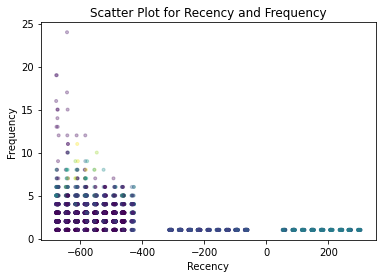

In [51]:
Monetary = reference_df.groupby('CustomerKey')['SalesAmount'].sum()
plt.scatter(rfm.groupby('CustomerKey')['Recency'].sum(), reference_df.groupby('CustomerKey')['OrderQuantity'].sum(),
            marker = '.', alpha = 0.3,c=Monetary)

plt.title('Scatter Plot for Recency and Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

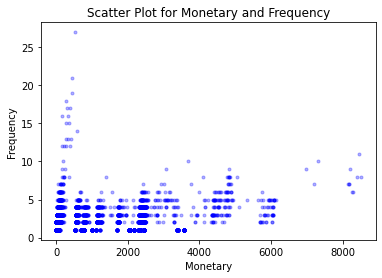

In [52]:
monetary_frequency = AdventureWorksData.groupby('CustomerKey')[['OrderQuantity', 'SalesAmount']].sum()

plt.scatter(monetary_frequency['SalesAmount'], monetary_frequency['OrderQuantity'],
            color = 'blue', marker = '.', alpha = 0.3)

plt.title('Scatter Plot for Monetary and Frequency')
plt.xlabel('Monetary')
plt.ylabel('Frequency')

In [58]:
def R_Score(x):
    if x['Recency'] <=60:
        recency = 3    
    elif x['Recency'] >60 and x['Recency'] <=120:
        recency = 2
    else:
        recency = 1
    return recency

rfm['R'] = rfm.apply(R_Score,axis=1)
    

In [57]:
def F_Score(x):
    if x['SalesOrderLineNumber'] <= 3:
        recency = 3
    elif x['SalesOrderLineNumber'] >3 and x['SalesOrderLineNumber'] <=6:
        recency = 2
    else:
        recency = 1
    return recency

rfm['F'] = rfm.apply(F_Score,axis=1)

In [59]:
pd.qcut(rfm['Monetary'],q=3).head()

0    (2049.098, 8498.64]
1    (2049.098, 8498.64]
2    (2049.098, 8498.64]
3    (2049.098, 8498.64]
4    (2049.098, 8498.64]
Name: Monetary, dtype: category
Categories (3, interval[float64, right]): [(2.289, 71.97] < (71.97, 2049.098] <
                                           (2049.098, 8498.64]]

In [60]:
monetaryscore = pd.qcut(rfm['Monetary'],q=3,labels=range(1,4))
rfm = rfm.assign(M = monetaryscore.values)

In [61]:
rfm.head()

,CustomerKey,Recency,SalesOrderLineNumber,Monetary,R,F,M
0,11000.0,-549,5,2507.03,3,2,3
1,11002.0,298,1,3399.99,1,3,3
2,11003.0,-431,4,2318.96,3,2,3
3,11004.0,-547,2,2419.06,3,3,3
4,11005.0,-548,1,2384.07,3,3,3


In [62]:
def RFM_Score(x):
    return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Score'] = rfm.apply(RFM_Score,axis=1)

In [63]:
rfm.head()

,CustomerKey,Recency,SalesOrderLineNumber,Monetary,R,F,M,RFM_Score
0,11000.0,-549,5,2507.03,3,2,3,3.02.03.0
1,11002.0,298,1,3399.99,1,3,3,1.03.03.0
2,11003.0,-431,4,2318.96,3,2,3,3.02.03.0
3,11004.0,-547,2,2419.06,3,3,3,3.03.03.0
4,11005.0,-548,1,2384.07,3,3,3,3.03.03.0


In [64]:
segment = [0]*len(rfm)

best = list(rfm.loc[rfm['RFM_Score']=='333'].index)
lost_cheap = list(rfm.loc[rfm['RFM_Score']=='111'].index)
lost = list(rfm.loc[rfm['RFM_Score']=='133'].index)
lost_almost = list(rfm.loc[rfm['RFM_Score']=='233'].index)

for i in range(0,len(rfm)):
    if rfm['RFM_Score'][i]=='111':
        segment[i]='Lost Cheap Customers'
    elif rfm['RFM_Score'][i]=='133':
        segment[i]='Lost Customers'
    elif rfm['RFM_Score'][i]=='233':
        segment[i]='Almost Lost Customers'
    elif rfm['RFM_Score'][i]=='333':
        segment[i]='Best Customers'
    else:
        segment[i]='Others'

In [67]:
best = list(rfm.loc[rfm['RFM_Score']=='333'].index)
lost_cheap = list(rfm.loc[rfm['RFM_Score']=='111'].index)
lost = list(rfm.loc[rfm['RFM_Score']=='133'].index)
lost_almost = list(rfm.loc[rfm['RFM_Score']=='233'].index)

In [68]:
loyal = list(rfm.loc[rfm['F']==3].index)
loyal2=[]
for i in loyal:
    if i not in best and i not in lost and i not in lost_cheap and i not in lost_almost:
            loyal2.append(i)
for i in rfm.index:
    if i in loyal2:
        segment[i] = 'Loyal Customers'

rfm.head()

,CustomerKey,Recency,SalesOrderLineNumber,Monetary,R,F,M,RFM_Score
0,11000.0,-549,5,2507.03,3,2,3,3.02.03.0
1,11002.0,298,1,3399.99,1,3,3,1.03.03.0
2,11003.0,-431,4,2318.96,3,2,3,3.02.03.0
3,11004.0,-547,2,2419.06,3,3,3,3.03.03.0
4,11005.0,-548,1,2384.07,3,3,3,3.03.03.0


In [69]:
big = list(rfm.loc[rfm['M']==3].index)
big2=[]
for i in big:
    if i not in best and i not in lost and i not in lost_cheap and i not in lost_almost:
            big2.append(i)
for i in rfm.index:
    if i in big2:
        segment[i] = 'Big Spenders'

rfm.head()

,CustomerKey,Recency,SalesOrderLineNumber,Monetary,R,F,M,RFM_Score
0,11000.0,-549,5,2507.03,3,2,3,3.02.03.0
1,11002.0,298,1,3399.99,1,3,3,1.03.03.0
2,11003.0,-431,4,2318.96,3,2,3,3.02.03.0
3,11004.0,-547,2,2419.06,3,3,3,3.03.03.0
4,11005.0,-548,1,2384.07,3,3,3,3.03.03.0


In [70]:
rfm['segment'] = segment

In [71]:
rfm.head(20)

,CustomerKey,Recency,SalesOrderLineNumber,Monetary,R,F,M,RFM_Score,segment
0,11000.0,-549,5,2507.03,3,2,3,3.02.03.0,Big Spenders
1,11002.0,298,1,3399.99,1,3,3,1.03.03.0,Big Spenders
2,11003.0,-431,4,2318.96,3,2,3,3.02.03.0,Big Spenders
3,11004.0,-547,2,2419.06,3,3,3,3.03.03.0,Big Spenders
4,11005.0,-548,1,2384.07,3,3,3,3.03.03.0,Big Spenders
5,11007.0,296,1,3399.99,1,3,3,1.03.03.0,Big Spenders
6,11008.0,-487,4,4731.32,3,2,3,3.02.03.0,Big Spenders
7,11009.0,-555,2,2419.06,3,3,3,3.03.03.0,Big Spenders
8,11016.0,-466,3,2332.28,3,3,3,3.03.03.0,Big Spenders
9,11017.0,-427,2,2316.97,3,3,3,3.03.03.0,Big Spenders


In [ ]:
segment1 = rfm.groupby('segment')['CustomerKey'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,8))
segment1.drop([0],inplace=True)

In [ ]:
segment
minimumsegment = min(segment['CustomerKey'])
minimumsegment

,segment,CustomerKey
1,Lost Customers,1773
2,Big Spenders,1659
3,Others,1624
4,Best Customers,996
5,Almost Lost Customers,737


737

In [ ]:
rfm_df = pd.DataFrame(r_f_m)
rfm_drop = df_RFM.drop(['segment'],axis=1)

In [ ]:
rfm_df = pd.DataFrame(r_f_m)
rfm_customer = pd.merge(rfm_df,response_df,on='CustomerKey')
rfm_customer.head()
rfm_customer.set_index('CustomerKey',inplace=True)

,CustomerKey,Recency,LineNumber,Monetary,R,F,M,RFM_Score,segment,Response
0,11000,212,5,4849.00,1,2,3,123,Big Spenders,0
1,11001,319,6,2419.93,1,2,3,123,Big Spenders,1
2,11002,281,2,2419.06,1,3,3,133,Lost Customers,0
3,11003,205,4,4739.30,1,2,3,123,Big Spenders,0
4,11004,214,3,4796.02,1,3,3,133,Lost Customers,0


In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_RFMRv['segment']= label_encoder.fit_transform(df_RFMRv['segment']) 
list = ['segment']
df_RFMRv.drop(df_RFMRv[list], axis=1, inplace=True)
df_RFMRv.head()

,Recency,LineNumber,Monetary,R,F,M,RFM_Score,Response
CustomerKey,,,,,,,,
11000,212,5,4849.00,1,2,3,123,0
11001,319,6,2419.93,1,2,3,123,1
11002,281,2,2419.06,1,3,3,133,0
11003,205,4,4739.30,1,2,3,123,0
11004,214,3,4796.02,1,3,3,133,0


# Modelling 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_RFM1,df_RFMRv['Response'],test_size=0.3,random_state=0)

print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (11083, 8)
X_test shape: (4751, 8)


In [ ]:
logistic_regression= LogisticRegression(max_iter=100)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

LogisticRegression()

In [ ]:
X_train.isnull().sum()

CustomerKey    0
Recency        0
LineNumber     0
Monetary       0
R              0
F              0
M              0
RFM_Score      0
dtype: int64

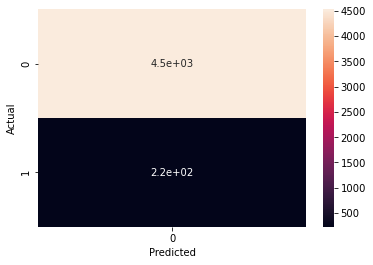

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
from sklearn.metrics import plot_roc_curve

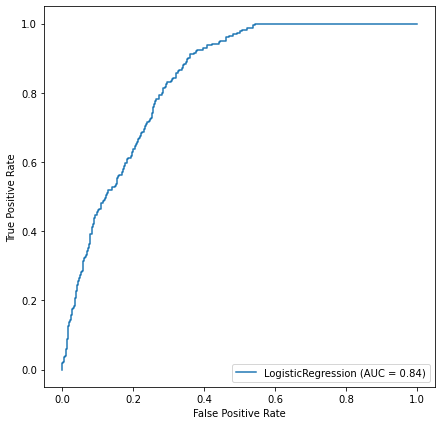

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(logistic_regression, X_test, y_test, ax = ax)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print(classification_report(y_test,y_pred))
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()
print(f1_score(y_test, y_pred, average = "weighted"))


              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4527
           1       0.00      0.00      0.00       224

    accuracy                           0.95      4751
   macro avg       0.48      0.50      0.49      4751
weighted avg       0.91      0.95      0.93      4751

Accuracy:  0.9528520311513365
0.9298471965988575


C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(random_state=0, max_depth=4)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
from sklearn.metrics import classification_report 

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4527
           1       0.70      0.03      0.06       224

    accuracy                           0.95      4751
   macro avg       0.83      0.52      0.52      4751
weighted avg       0.94      0.95      0.93      4751



In [ ]:
from sklearn.metrics import confusion_matrix

[[4524    3]
 [ 217    7]]


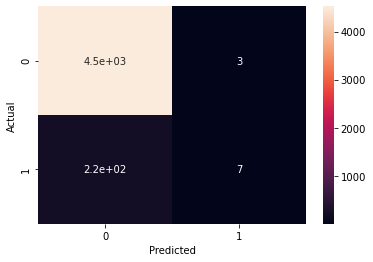

In [ ]:
print(confusion_matrix(y_test, y_pred))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
from sklearn.metrics import plot_roc_curve

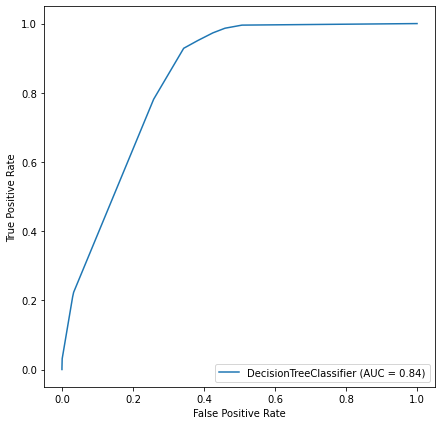

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(clf, X_test, y_test, ax = ax)

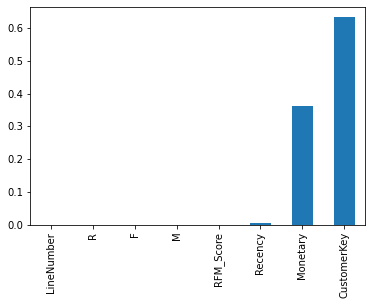

In [ ]:
describe = clf.feature_importances_
bars = pd.Series(describe,index=X_train.columns.values)
bars.sort_values()[-10:].plot(kind = 'bar')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

RandomForestClassifier(random_state=0)

Model accuracy score with 10 decision-trees : 0.9569


In [ ]:
from sklearn.metrics import classification_report 

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4527
           1       0.81      0.11      0.20       224

    accuracy                           0.96      4751
   macro avg       0.88      0.56      0.59      4751
weighted avg       0.95      0.96      0.94      4751



In [ ]:
from sklearn.metrics import confusion_matrix

[[4521    6]
 [ 199   25]]


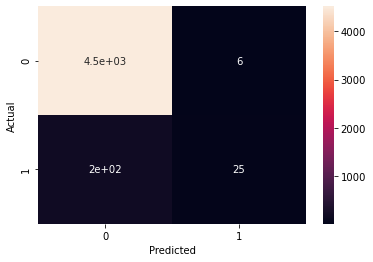

In [ ]:
print(confusion_matrix(y_test, y_pred))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
from sklearn.metrics import plot_roc_curve

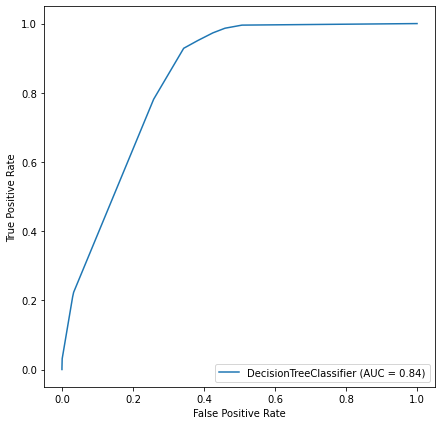

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(clf, X_test, y_test, ax = ax)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

GaussianNB()

In [ ]:
from sklearn.metrics import classification_report 

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4527
           1       0.00      0.00      0.00       224

    accuracy                           0.95      4751
   macro avg       0.48      0.50      0.49      4751
weighted avg       0.91      0.95      0.93      4751



C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

[[4527    0]
 [ 224    0]]


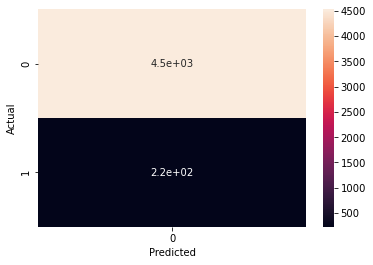

In [ ]:
print(confusion_matrix(y_test, y_pred))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

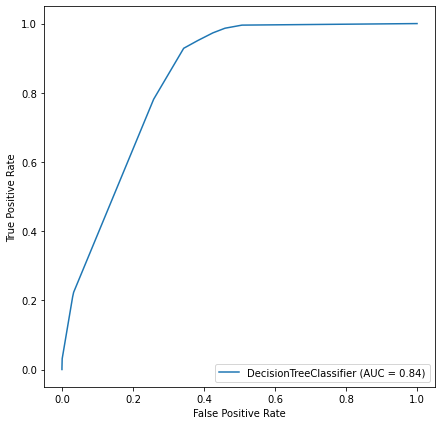

In [ ]:
from sklearn.metrics import plot_roc_curve
fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(clf, X_test, y_test, ax = ax)